# Friendship paradox in the academic field
### Introduction

Firstly, I will investigate the presence of the 'friendship paradox' in the arXiv dataset. The 'friendship paradox' is defined as the statement that 'most people have fewer friends than their friends have, on average'. The logic is that you are more likely to be friends with someone with many friends, and so on average your friends will have more friends than you. This logic could extend to academics since the field is very collaborative. 

#### 1. Here I prepare the data for analysis.

For the first part, I have parsed the data using json, then created a dict of list to store the collaborators for each author. I retrieved the names from 'authors_parsed'. Note that the last name of each author is stated first (followed by any first names or initials).

In [1]:
import json

file = "../data/arxiv-metadata-oai-snapshot.json"

data=[]
with open(file, "r") as f:
    for i in range(0,1993027):
        d=next(f).strip()
        data.append(json.loads(d))

# Here, we filter out the statistics papers from the data.

stats_str='stat.'
data_stats=[]
for i in range(0,len(data)):
    if stats_str in data[i]['categories']:
        data_stats.append(data[i])
        
# Here, we create a list of lists of collaborators of projects.  

stats_authors_1=[]
for i in range(0,len(data_stats)):
    stats_authors_1.append(data_stats[i]['authors_parsed'])
    assert len(stats_authors_1[i])>0, "No authors recorded at index {}".format(i)
    for j in range(0,len(stats_authors_1[i])):
        del stats_authors_1[i][j][2:]
        stats_authors_1[i][j]=' '.join(stats_authors_1[i][j])
        
#Here, we create a dictionary of each author and those which which they have collaborated.


def create_dict(stats_authors):
    author_pairs={}
    for i in range(0,len(stats_authors)):
        for j in range(0,len(stats_authors[i])):
            if stats_authors[i][j] not in author_pairs.keys():
                author_pairs[stats_authors[i][j]]=[]

    for i in range(0,len(stats_authors)):
        for j in range(0,len(stats_authors[i])):
            for k in range(0,len(stats_authors[i])):
                if stats_authors[i][j]!=stats_authors[i][k]:
                    if author_pairs[stats_authors[i][j]]==[]:
                        author_pairs[stats_authors[i][j]].append(stats_authors[i][k])
                    elif stats_authors[i][j] and stats_authors[i][k] not in author_pairs[stats_authors[i][j]]:
                        author_pairs[stats_authors[i][j]].append(stats_authors[i][k])
    return author_pairs

author_pairs_1=create_dict(stats_authors_1)

#### 2. Now, I will determine the number of collaborators each author has.

In [2]:
num_collab={}
def find_num_collab(author_pairs):
    for key in author_pairs:
        num_collab[key]=len(author_pairs[key])
    return num_collab
num_collab_1=find_num_collab(author_pairs_1)

#### 3. Here I find the average number of collaborators of the collaborators of each author. 

For testing purposes, I have have found the average difference in the number of collaborators between an author and their collaboraters. If it is negative, that indicates that on average an author has fewer collaboraters than their collaboraters, and therefore presense of the friendship paradox is seen.

Finally, I have created find_percent_paradox. For the sake of thoroughness, I also wanted to see the proportion of authors with more, fewer or the same average numbers of collaborators as their collaborators.

In [3]:
#This is the average number of collaboraters of the collaboraters of each author.

def find_av_collab(author_pairs, num_collab):
    av_collab={}
    for author in author_pairs:
        av_collab[author]=0
        for i in range(0,(len(author_pairs[author]))):
            av_collab[author]=av_collab[author]+num_collab[author_pairs[author][i]]
    for author in author_pairs:
        if num_collab[author]>0:
            av_collab[author]=av_collab[author]/num_collab[author]
        else:
            av_collab[author]=0
    return av_collab
av_collab_1=find_av_collab(author_pairs_1, num_collab_1)
        
#Testing
av_diff_collab=0
for author in num_collab_1:
    av_diff_collab+=num_collab_1[author]-av_collab_1[author]
av_diff_collab=round(av_diff_collab/len(stats_authors_1),2)

#Percent_less is the proportion of the authors that have fewer collaboraters than their collaboraters.
#Percent_equal is the proportion of the authors that have the same number of collaboraters as their collaboraters.
#Percent_more is the proportion of authors that have more collaboraters than their collaboraters.

def find_percent_paradox(author_pairs,num_collab,av_collab):
    count_less=0
    count_more=0
    count_equal=0
    for author in author_pairs:
        if av_collab[author]>num_collab[author]:
            count_less+=1
        if av_collab[author]==num_collab[author]:
            count_equal+=1
        if av_collab[author]<num_collab[author]:
            count_more+=1

    percent_less=round((count_less/len(author_pairs))*100,2)
    percent_equal=round((count_equal/len(author_pairs))*100,2)
    percent_more=round((count_more/len(author_pairs))*100,2)
    
    return f'{percent_less}% of the authors have fewer collaborators than their collaborators. {percent_equal}% of the authors have the same number of collaborators as their collaborators. {percent_more}% of the authors have more collaborators than their collaborators.'

print(f'The average difference between authors and their collaborators is {av_diff_collab}.') 
print(find_percent_paradox(author_pairs_1, num_collab_1,av_collab_1))

The average difference between authors and their collaborators is -11.61.
73.88% of the authors have fewer collaborators than their collaborators. 16.52% of the authors have the same number of collaborators as their collaborators. 9.6% of the authors have more collaborators than their collaborators.


#### 4. Explanation of the result

We can see a definitive case of the 'friendship paradox', with 74% of authors having fewer collaborators than their collaborators. If every author had on average the same number of collaborators, this figure would be 50%, but in this case there is almost a 50% increase in what we would expect were the data 'balanced'.

From the 'testing' statistic, we can quantify the effect even further. On average, an author has 12% fewer collaborators than their collaborators. This is a fairly extreme percentage, suggesting a significant skew in favour of the paradox. To examine the data further, I have created a number of visualisations.

Text(0, 0.5, 'frequency (number of authors)')

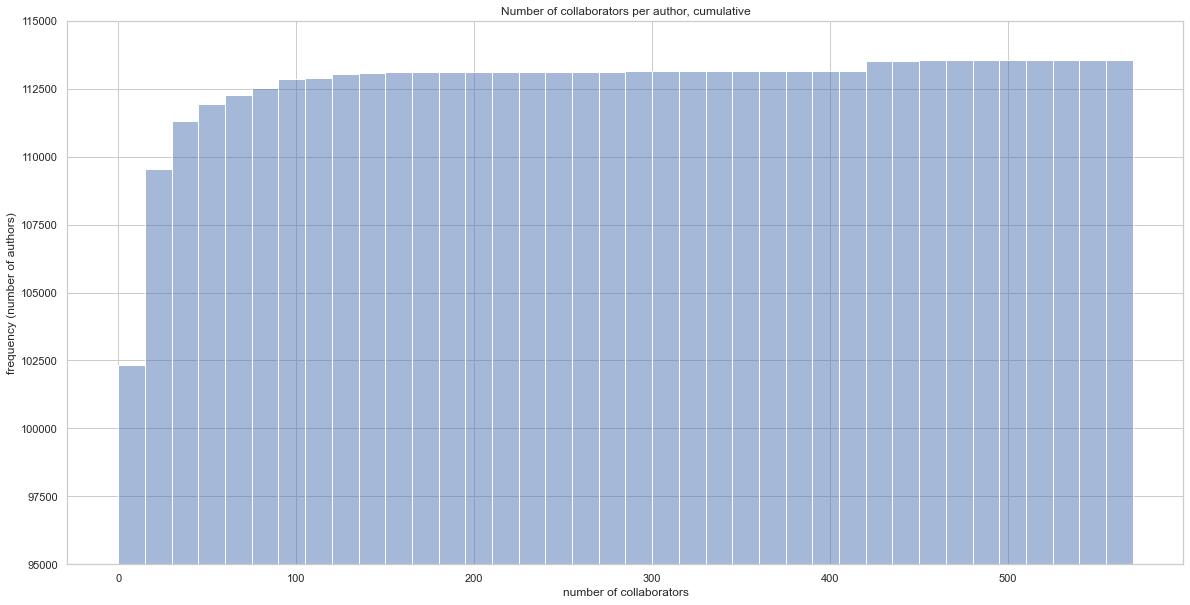

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

n_c_df=pd.DataFrame(num_collab_1.values())

sns.set(style='whitegrid',rc = {'figure.figsize':(20,10)})
num_collab_hist_cum=sns.histplot(data=n_c_df,stat='count', binwidth=15, cumulative=True,legend=False).set(title='Number of collaborators per author, cumulative')
plt.ylim(95000,115000)
plt.xlabel('number of collaborators')
plt.ylabel('frequency (number of authors)')

From this visualisation, we can see that the vast majority of the 'number of collaborators' lies between 0 and 100. There are an extreme number of outlier between 100 and 600, which is likely contributing to the 'skew' that demonstrates the 'friendship paradox'.

In [5]:
import pandas as pd
num_collab_df=pd.DataFrame(num_collab_1.values())
pd.DataFrame.describe(num_collab_df)

,0
count,113560.000000
mean,8.733903
std,28.432013
min,0.000000
25%,2.000000
50%,4.000000
75%,7.000000
max,568.000000


From the summary statistics, since 75% of the data is between 0 and 7 collaborators, we can see that there is a large amount of extreme outliers. The following are histograms of smaller portions of the data to emphasise the prevalance of these outliers.

Text(0, 0.5, 'number of authors')

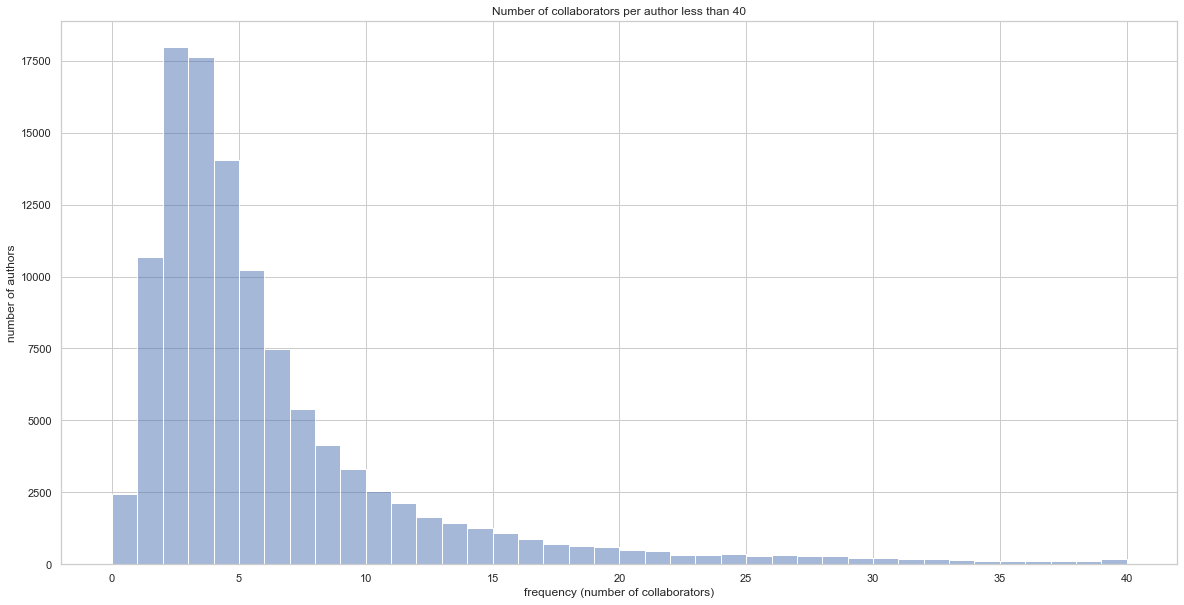

In [6]:
num_collab_hist_low=sns.histplot(data=n_c_df,stat='count', binwidth=1, binrange=(0,40), legend=False).set(title='Number of collaborators per author less than 40')
plt.xlabel('frequency (number of collaborators)')
plt.ylabel('number of authors')

Text(0, 0.5, 'frequency (number of authors)')

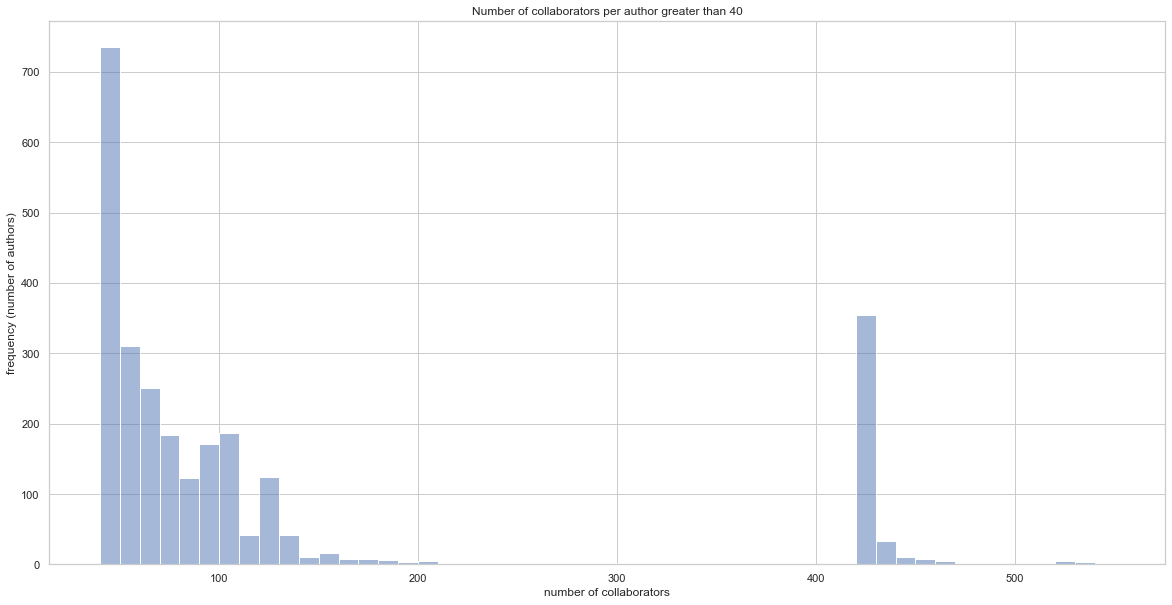

In [7]:
num_collab_hist_high=sns.histplot(data=n_c_df,stat='count', binwidth=10, binrange=(40,550), legend=False).set(title='Number of collaborators per author greater than 40')
plt.xlabel('number of collaborators')
plt.ylabel('frequency (number of authors)')

Between 400 and 500 along the x-axis, we can see that there are around 350 authors with the same number of authors which is perhaps indicative of them all belonging to the same research paper. It appears that there are likely to be a large number of such papers, that is papers with huge numbers of collaborators which are relatively rare in the dataset.

To investigate further, I will look at the author with the largest number of collaborators.

In [8]:
max_author = max(num_collab, key=num_collab.get)
max_author_=max_author.split(' ')
print('The author with the largest number of collaborators,', max_author_[1], max_author_[0],'has', num_collab[max_author], 'collaborators.')

The author with the largest number of collaborators, Hongtu Zhu has 568 collaborators.


In [9]:
zhu_paper_1='Spyridon Bakas, Mauricio Reyes, Andras Jakab, Stefan Bauer, Markus Rempfler, Alessandro Crimi, Russell Takeshi Shinohara, Christoph Berger, Sung Min Ha, Martin Rozycki, Marcel Prastawa, Esther Alberts, Jana Lipkova, John Freymann, Justin Kirby, Michel Bilello, Hassan Fathallah-Shaykh, Roland Wiest, Jan Kirschke, Benedikt Wiestler, Rivka Colen, Aikaterini Kotrotsou, Pamela Lamontagne, Daniel Marcus, Mikhail Milchenko, Arash Nazeri, Marc-Andre Weber, Abhishek Mahajan, Ujjwal Baid, Elizabeth Gerstner, Dongjin Kwon, Gagan Acharya, Manu Agarwal, Mahbubul Alam, Alberto Albiol, Antonio Albiol, Francisco J Albiol, Varghese Alex, Nigel Allinson, Pedro HA Amorim, Abhijit Amrutkar, Ganesh Anand, Simon Andermatt, Tal Arbel, Pablo Arbelaez, Aaron Avery, Muneeza Azmat, W Bai, Subhashis Banerjee, Bill Barth, Thomas Batchelder, Kayhan Batmanghelich, Enzo Battistella, Andrew Beers, Mikhail Belyaev, Martin Bendszus, Eze Benson, Jose Bernal, Halandur Nagaraja Bharath, George Biros, Sotirios Bisdas, James Brown, Mariano Cabezas, Shilei Cao, Jorge M Cardoso, Eric N Carver, Adrià Casamitjana, Laura Silvana Castillo, Marcel Catà, Philippe Cattin, Albert Cerigues, Vinicius S Chagas, Siddhartha Chandra, Yi-Ju Chang, Shiyu Chang, Ken Chang, Joseph Chazalon, Shengcong Chen, Wei Chen, Jefferson W Chen, Zhaolin Chen, Kun Cheng, Ahana Roy Choudhury, Roger Chylla, Albert Clérigues, Steven Colleman, Ramiro German Rodriguez Colmeiro, Marc Combalia, Anthony Costa, Xiaomeng Cui, Zhenzhen Dai, Lutao Dai, Laura Alexandra Daza, Eric Deutsch, Changxing Ding, Chao Dong, Shidu Dong, Wojciech Dudzik, Zach Eaton-Rosen, Gary Egan, Guilherme Escudero, Théo Estienne, Richard Everson, Jonathan Fabrizio, Yong Fan, Longwei Fang, Xue Feng, Enzo Ferrante, Lucas Fidon, Martin Fischer, Andrew P French, Naomi Fridman, Huan Fu, David Fuentes, Yaozong Gao, Evan Gates, David Gering, Amir Gholami, Willi Gierke, Ben Glocker, Mingming Gong, Sandra González-Villá, T Grosges, Yuanfang Guan, Sheng Guo, Sudeep Gupta, Woo-Sup Han, Il Song Han, Konstantin Harmuth, Huiguang He, Aura Hernández-Sabaté, Evelyn Herrmann, Naveen Himthani, Winston Hsu, Cheyu Hsu, Xiaojun Hu, Xiaobin Hu, Yan Hu, Yifan Hu, Rui Hua, Teng-Yi Huang, Weilin Huang, Sabine Van Huffel, Quan Huo, Vivek HV, Khan M Iftekharuddin, Fabian Isensee, Mobarakol Islam, Aaron S Jackson, Sachin R Jambawalikar'
zhu_paper_1=zhu_paper_1.split(',')
len(zhu_paper_1)

150

Upon closser inspection, the first few papers that come up through the Google Scholar search engine that list Hongtu Zhu as an author show a significant number of authors. For example, the first paper lists 150 authors. In this paper in particular, "Identifying the Best Machine Learning Algorithms for Brain Tumor Segmentation, Progression Assessment, and Overall Survival Prediction in the BRATS Challenge", authors listed are from a wide range of insitutions globally, some of whom contributing by way of the data-sets used in the paper and also those involved in the "BraTS Challenge". I believe that it may be the case, as with many of the other outlying research papers, that the definition of "collaborators" is stretched. 

However, this may still not be enough to explain the 'friendship paradox'. The following is a demonstration of the data when all extremeties are stripped out.

Using the sample statistics from earlier, the upper bound is 7 + 1.5x(7-2)=14.5. Anything above is statistically an outlier.

(0.0, 14.0)

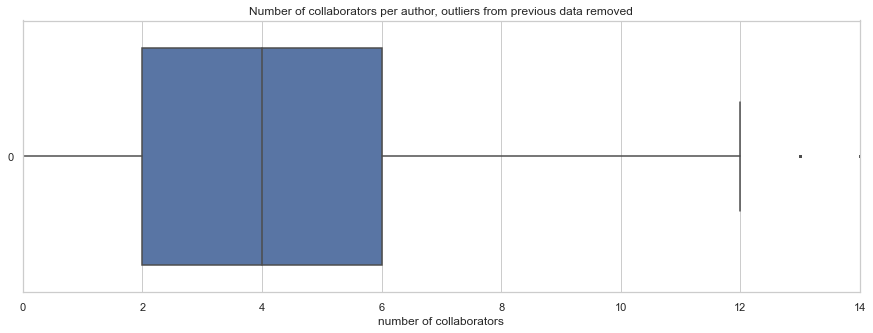

In [18]:
sns.set(style='whitegrid',rc = {'figure.figsize':(15,5)})
num_collab_2={key:val for key, val in num_collab_1.items() if val <= 14.5}
n_c_df_2=pd.DataFrame(num_collab_2.values())
num_collab_2_box=sns.boxplot(data=n_c_df_2, fliersize=.8, orient='h').set(title='Number of collaborators per author, outliers from previous data removed')
plt.xlabel('number of collaborators')
plt.xlim(0,14)

Even eliminating every outlier in the dataset, there is still a significant skew towards authors having a lower than average number of collaborators and the 'friendship paradox' still holding.

### Conclusion

There appears to be significant evidence for the presence of the 'friendship paradox' in the arXiv dataset. Upon first examination, there were a large number of extreme outliers which would have contributed to the high 'friendship paradox' percentage. With more time and more tools, it would have perhaps been beneficial to delve deeper into why so many extreme outliers exist in this field of academia, or indeed if it is a more general trend among academic papers. 

Regardless, even if these values are stripped out of the data, the skew (as demonstrated by the boxplot) shows that the 'friendship paradox' is still present in the data. 